In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sys

sys.path.append("..")

In [4]:
# Import the various experiments we need for the notebook
from sva.experiments import (
    negatedRosenbrock2d,
    Rastrigin2d,
    negatedAckley2d,
    PolicyPerformanceEvaluator,
    CampaignParameters,
)
# Import the seeding function for reproducibility
from sva.utils import seed_everything, set_mpl_defaults

c:\Users\Tejus\ScientificValueAgent\notebooks\..\sva\_version.py:9: UserWarning: You are using a local development copy of sva,dunamai is not installed, as such __version__ cannot bedetected and is set to 'dev' by default. For correct localversion tracking, install dunamai locally (pip install dunamai).
  warn("You are using a local development copy of sva,"
c:\Users\Tejus\Anaconda3\envs\SVA_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
set_mpl_defaults()

# More 2d examples

As in Notebook 04, here we test a few other benchmark optimization functions. Each function is plotted as a 2d heatmap for the ground truth, with the `n` randomly-initialized data points as black dots and the true maxima as red X's.

### Rosenbrock Function

In [6]:
seed_everything(1234)
experiment = negatedRosenbrock2d()
experiment.initialize_data(n=5, protocol="random")

In [7]:
x = experiment.get_dense_coordinates(ppd=100)
y, _ = experiment(x)
extent = experiment.get_experimental_domain_mpl_extent()

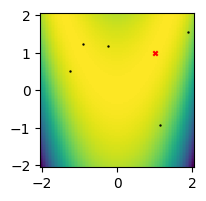

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(2, 2))

X, Y = experiment.data.X, experiment.data.Y
ax.imshow(
    y.reshape(100, 100).T,
    extent=extent,
    interpolation="nearest",
    origin="lower",
)
ax.scatter(X[:, 0], X[:, 1], color="black", s=0.5)
ax.scatter(1, 1, s=10, color="red", marker="x")

plt.show()

Rosenbrock's valley is given by $f(x,y) = (a-x)^2 + b(y-x^2)^2$, and has a minimum along a parabolic valley. The location of this minimum is given by $(x,y) = (a, a^2)$. \

We've posed this exercise as a maximization problem, so the function has been negated, therefore the global minimum is now the global maximum. Using conventional values of $a=1, b=100$, the maximum lies at $(1,1)$

In [11]:
seed_everything(1234)
experiment = negatedRosenbrock2d()
experiment.initialize_data(n=5, protocol="random")

In [12]:
parameter_list = [
    CampaignParameters(acquisition_function={"method": "EI", "kwargs": None}),
    CampaignParameters(
        acquisition_function={"method": "UCB", "kwargs": {"beta": 2.0}}
    ),
    CampaignParameters(
        acquisition_function={"method": "UCB", "kwargs": {"beta": 20.0}}
    ),
    CampaignParameters(
        acquisition_function={"method": "UCB", "kwargs": {"beta": 100.0}}
    ),
]

c:\Users\Tejus\ScientificValueAgent\notebooks\..\sva\experiments\campaign.py:138: UserWarning: train_protocol was unset. Using default: {'method': 'fit_mll', 'kwargs': {}}
  warn(
c:\Users\Tejus\ScientificValueAgent\notebooks\..\sva\experiments\campaign.py:158: UserWarning: optimize_acqf_kwargs was unset. Using default: {'q': 1, 'num_restarts': 20, 'raw_samples': 100}
  warn(
c:\Users\Tejus\ScientificValueAgent\notebooks\..\sva\experiments\campaign.py:167: UserWarning: model_factory was unset. Using default EasyTaskGP.from_default
  warn("model_factory was unset. Using default EasyTaskGP.from_default")


In [13]:
policy_evaluator = PolicyPerformanceEvaluator(
    experiment, checkpoint_dir="checkpoints/misc2d/Rosenbrock_n20"
)
policy_evaluator.run(5, 50, parameter_list, n_jobs=12)

In [14]:
policy_results = policy_evaluator.process_results()

In [15]:
plot_kwargs = {
    "linewidth": 1.0,
    "marker": "s",
    "ms": 1.0,
    "capthick": 0.3,
    "capsize": 2.0,
    "elinewidth": 0.3,
}

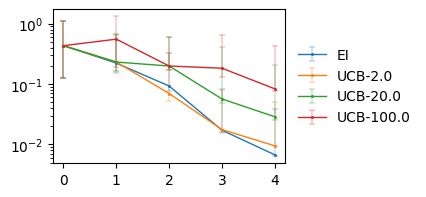

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2), sharex=True, sharey=True)

for ii, (key, value) in enumerate(policy_results.items()):
    res = value["results"]
    x = np.arange(res.shape[1])
    y = np.median(res, axis=0)
    percentiles = np.percentile(res, q=[25, 75], axis=0)
    ax.errorbar(x, y, yerr=percentiles, label=key, **plot_kwargs)
ax.legend(frameon=False, bbox_to_anchor=(1, 0.5), loc="center left")
ax.set_yscale("log")
plt.show()

### Rastrigin Function

In [17]:
seed_everything(1234)
experiment = Rastrigin2d()
experiment.initialize_data(n=5, protocol="random")

In [18]:
x = experiment.get_dense_coordinates(ppd=100)
y, _ = experiment(x)
extent = experiment.get_experimental_domain_mpl_extent()

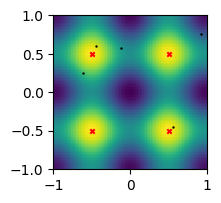

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(2, 2))

X, Y = experiment.data.X, experiment.data.Y
ax.imshow(
    y.reshape(100, 100).T,
    extent=extent,
    interpolation="nearest",
    origin="lower",
)
ax.scatter(X[:, 0], X[:, 1], color="black", s=0.5)
ax.scatter([-0.5028, -0.5028, 0.5028, 0.5028], [-0.5028, 0.5028, -0.5028, 0.5028], s=10, color="red", marker="x")

plt.show()

The Rastrigin function in 2 dimensions is given by $f(x,y) = 20 + [x^2 - 10cos(2 \pi x)] + [y^2 - 10cos(2 \pi y)]$. \
Several local maxima are present within the experimental domain shown here. They occur at $(x,y) = (\pm 0.5028, \pm 0.5028)$.

In [20]:
seed_everything(1234)
experiment = Rastrigin2d()
experiment.initialize_data(n=5, protocol="random")

In [21]:
parameter_list = [
    CampaignParameters(acquisition_function={"method": "EI", "kwargs": None}),
    CampaignParameters(
        acquisition_function={"method": "UCB", "kwargs": {"beta": 2.0}}
    ),
    CampaignParameters(
        acquisition_function={"method": "UCB", "kwargs": {"beta": 20.0}}
    ),
    CampaignParameters(
        acquisition_function={"method": "UCB", "kwargs": {"beta": 100.0}}
    ),
]

c:\Users\Tejus\ScientificValueAgent\notebooks\..\sva\experiments\campaign.py:138: UserWarning: train_protocol was unset. Using default: {'method': 'fit_mll', 'kwargs': {}}
  warn(
c:\Users\Tejus\ScientificValueAgent\notebooks\..\sva\experiments\campaign.py:158: UserWarning: optimize_acqf_kwargs was unset. Using default: {'q': 1, 'num_restarts': 20, 'raw_samples': 100}
  warn(
c:\Users\Tejus\ScientificValueAgent\notebooks\..\sva\experiments\campaign.py:167: UserWarning: model_factory was unset. Using default EasyTaskGP.from_default
  warn("model_factory was unset. Using default EasyTaskGP.from_default")


In [22]:
policy_evaluator = PolicyPerformanceEvaluator(
    experiment, checkpoint_dir="checkpoints/misc2d/Rastrigin_n20"
)
policy_evaluator.run(5, 50, parameter_list, n_jobs=12)

In [23]:
policy_results = policy_evaluator.process_results()

In [24]:
plot_kwargs = {
    "linewidth": 1.0,
    "marker": "s",
    "ms": 1.0,
    "capthick": 0.3,
    "capsize": 2.0,
    "elinewidth": 0.3,
}

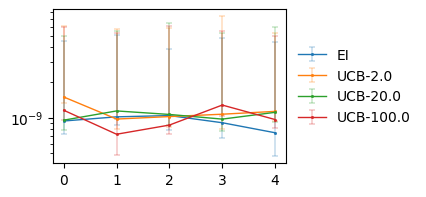

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2), sharex=True, sharey=True)

for ii, (key, value) in enumerate(policy_results.items()):
    res = value["results"]
    x = np.arange(res.shape[1])
    y = np.median(res, axis=0)
    percentiles = np.percentile(res, q=[25, 75], axis=0)
    ax.errorbar(x, y, yerr=percentiles, label=key, **plot_kwargs)
ax.legend(frameon=False, bbox_to_anchor=(1, 0.5), loc="center left")
ax.set_yscale("log")
plt.show()

### Ackley Function

In [26]:
seed_everything(1234)
experiment = negatedAckley2d()
experiment.initialize_data(n=5, protocol="random")

In [27]:
x = experiment.get_dense_coordinates(ppd=100)
y, _ = experiment(x)
extent = experiment.get_experimental_domain_mpl_extent()

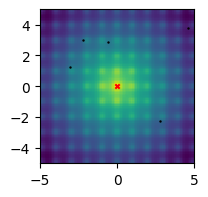

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(2, 2))

X, Y = experiment.data.X, experiment.data.Y
ax.imshow(
    y.reshape(100, 100).T,
    extent=extent,
    interpolation="nearest",
    origin="lower",
)
ax.scatter(X[:, 0], X[:, 1], color="black", s=0.5)
ax.scatter(0, 0, s=10, color="red", marker="x")

plt.show()

The Ackley function in 2 dimensions is given by $f(x,y) = -20exp[-0.2 \sqrt{0.5(x^2 + y^2)}] - exp[0.5(cos(2 \pi x) + cos(2 \pi y))] + e + 20$. 

It has several local extrema and a global minimum at $(x,y) = (0,0)$. Once again, we negate this function to treat this as a maximization problem, with the global maximum at the origin.

In [30]:
seed_everything(1234)
experiment = negatedAckley2d()
experiment.initialize_data(n=5, protocol="random")

In [31]:
parameter_list = [
    CampaignParameters(acquisition_function={"method": "EI", "kwargs": None}),
    CampaignParameters(
        acquisition_function={"method": "UCB", "kwargs": {"beta": 2.0}}
    ),
    CampaignParameters(
        acquisition_function={"method": "UCB", "kwargs": {"beta": 20.0}}
    ),
    CampaignParameters(
        acquisition_function={"method": "UCB", "kwargs": {"beta": 100.0}}
    ),
]

c:\Users\Tejus\ScientificValueAgent\notebooks\..\sva\experiments\campaign.py:138: UserWarning: train_protocol was unset. Using default: {'method': 'fit_mll', 'kwargs': {}}
  warn(
c:\Users\Tejus\ScientificValueAgent\notebooks\..\sva\experiments\campaign.py:158: UserWarning: optimize_acqf_kwargs was unset. Using default: {'q': 1, 'num_restarts': 20, 'raw_samples': 100}
  warn(
c:\Users\Tejus\ScientificValueAgent\notebooks\..\sva\experiments\campaign.py:167: UserWarning: model_factory was unset. Using default EasyTaskGP.from_default
  warn("model_factory was unset. Using default EasyTaskGP.from_default")


In [32]:
policy_evaluator = PolicyPerformanceEvaluator(
    experiment, checkpoint_dir="checkpoints/misc2d/Ackley_n20"
)
policy_evaluator.run(5, 50, parameter_list, n_jobs=12)

In [33]:
policy_results = policy_evaluator.process_results()

In [34]:
plot_kwargs = {
    "linewidth": 1.0,
    "marker": "s",
    "ms": 1.0,
    "capthick": 0.3,
    "capsize": 2.0,
    "elinewidth": 0.3,
}

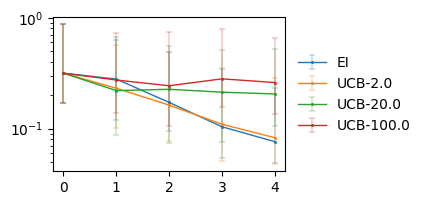

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2), sharex=True, sharey=True)

for ii, (key, value) in enumerate(policy_results.items()):
    res = value["results"]
    x = np.arange(res.shape[1])
    y = np.median(res, axis=0)
    percentiles = np.percentile(res, q=[25, 75], axis=0)
    ax.errorbar(x, y, yerr=percentiles, label=key, **plot_kwargs)
ax.legend(frameon=False, bbox_to_anchor=(1, 0.5), loc="center left")
ax.set_yscale("log")
plt.show()